In [ ]:
!ls -lah

total 205M
drwxr-xr-x  2 origami origami 4.0K Oct  9 20:44 .
drwxr-xr-x 10 origami origami 4.0K Oct  9 00:27 ..
-rw-r--r--  1 origami origami 196M Oct  7 20:30 calls.csv
-rw-r--r--  1 origami origami 2.0M Oct  7 20:32 customers.csv
-rw-r--r--  1 origami origami 1.7M Oct  9 15:21 hack.pptx
-rw-r--r--  1 origami origami 9.8K Oct  9 00:28 problem.docx
-rw-r--r--  1 origami origami 6.4K Oct  9 04:43 problem.md
-rw-r--r--  1 origami origami    0 Oct  9 00:27 README.md
-rw-r--r--  1 origami origami 1.6M Oct  7 20:31 reason.csv
-rw-r--r--  1 origami origami 3.0M Oct  7 20:29 sentiment_statistics.csv
-rw-r--r--  1 origami origami 342K Oct  9 20:43 skyhack.ipynb
-rw-r--r--  1 origami origami  61K Oct  7 20:29 test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

calls_df = pd.read_csv('calls.csv')
customers_df = pd.read_csv('customers.csv')
reason_df = pd.read_csv('reason.csv')
sentiment_df = pd.read_csv('sentiment_statistics.csv')
test_df = pd.read_csv('test.csv')


In [ ]:
# Display basic information about the datasets
print("Calls Dataset:")
print(calls_df.info())
print("\nCustomers Dataset:")
print(customers_df.info())
print("\nReason Dataset:")
print(reason_df.info())
print("\nSentiment Statistics Dataset:")
print(sentiment_df.info())
print("\nTest Dataset:")
print(test_df.info())

Calls Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB
None

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       71810 non-null  int64  
 1   customer_name     71810 non-null  object 
 2   elite_level_code  46043 

In [5]:
print("\nMissing Values:")
print(calls_df.isnull().sum())

# 2. Describe numerical columns
print("\nNumerical Columns Summary:")
print("Size of Calls Dataset: ", calls_df.shape)
print(calls_df.describe())




Missing Values:
call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64

Numerical Columns Summary:
Size of Calls Dataset:  (71810, 7)
            call_id   customer_id       agent_id
count  7.181000e+04  7.181000e+04   71810.000000
mean   4.993574e+09  5.004334e+09  564768.278039
std    2.889673e+09  2.884255e+09  257532.362167
min    1.316420e+05  1.197800e+04  102574.000000
25%    2.480013e+09  2.514618e+09  347606.000000
50%    4.989448e+09  4.999664e+09  591778.000000
75%    7.493629e+09  7.509126e+09  786323.000000
max    9.999806e+09  9.999935e+09  993862.000000


In [6]:
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

In [7]:
calls_df['AHT'] = (calls_df['call_end_datetime'] - calls_df['agent_assigned_datetime']).dt.total_seconds()
calls_df['AST'] = (calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()

In [9]:
calls_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0


/tmp/ipykernel_78127/3648627979.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(calls_df['AHT'], shade=True, color='blue')
/tmp/ipykernel_78127/3648627979.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(calls_df['AST'], shade=True, color='green')


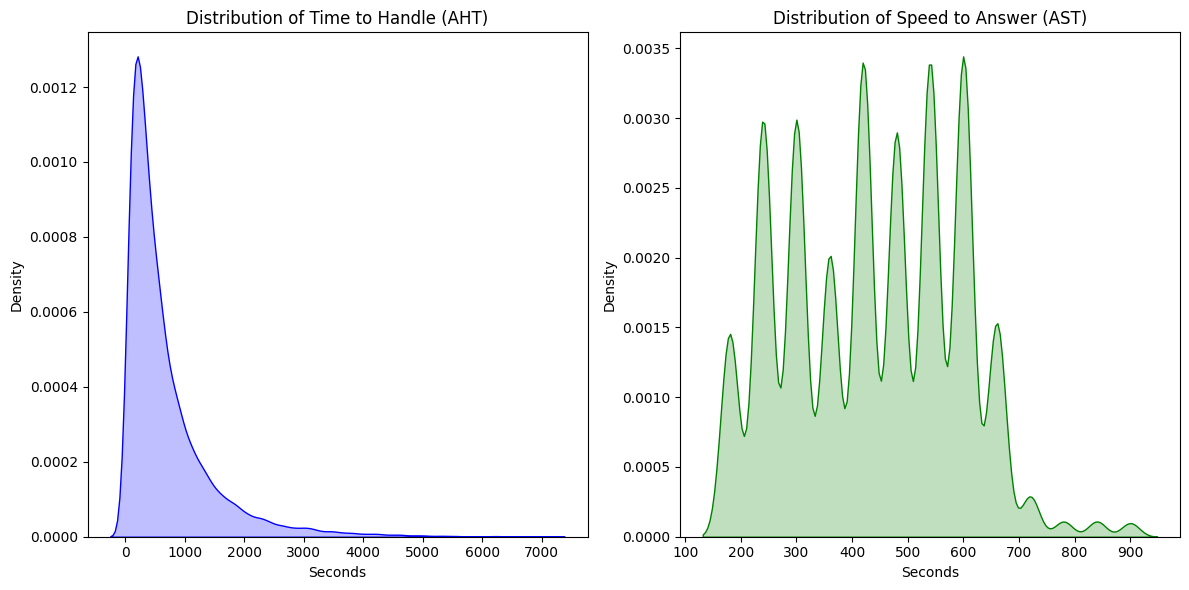

In [10]:
plt.figure(figsize=(12, 6))

# KDE plot for AHT
plt.subplot(1, 2, 1)
sns.kdeplot(calls_df['AHT'], shade=True, color='blue')
plt.title('Distribution of Time to Handle (AHT)')
plt.xlabel('Seconds')

# KDE plot for AST
plt.subplot(1, 2, 2)
sns.kdeplot(calls_df['AST'], shade=True, color='green')
plt.title('Distribution of Speed to Answer (AST)')
plt.xlabel('Seconds')

plt.tight_layout()
plt.show()


In [ ]:
average_AHT = calls_df['AHT'].mean()
average_AST = calls_df['AST'].mean()

print(f"Average Handle Time (AHT): {average_AHT} seconds")
print(f"Average Speed to Answer (AST): {average_AST} seconds")

Average Handle Time (AHT): 697.0486004734717 seconds
Average Speed to Answer (AST): 437.0675393399248 seconds


In [ ]:
calls_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0


In [ ]:
customers_df.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [ ]:
customers_df['elite_level_code'] = customers_df['elite_level_code'].fillna(0)
customers_df['elite_level_code'].unique()

array([4., 0., 2., 5., 1., 3.])

In [ ]:
reason_df.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [ ]:
calls_df = pd.merge(calls_df, reason_df, on='call_id', how='left')
calls_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST,primary_call_reason
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0,Voluntary Cancel
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,Booking
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0,IRROPS
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0,Upgrade
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0,Seating


In [ ]:
calls_df['primary_call_reason'] = calls_df['primary_call_reason'].fillna('Unknown').apply(lambda x: ' '.join(x.split()).capitalize())
calls_df['primary_call_reason'].unique()

array(['Voluntary cancel', 'Booking', 'Irrops', 'Upgrade', 'Seating',
       'Mileage plus', 'Checkout', 'Unknown', 'Voluntary change',
       'Post flight', 'Check in', 'Other topics', 'Communications',
       'Schedule change', 'Products & services', 'Digital support',
       'Disability', 'Unaccompanied minor', 'Baggage', 'Traveler updates',
       'Etc', 'Post-flight', 'Check-in', 'Products and services'],
      dtype=object)

/tmp/ipykernel_4801/761978602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='primary_call_reason', data=calls_df, order=calls_df['primary_call_reason'].value_counts().index, palette='viridis')


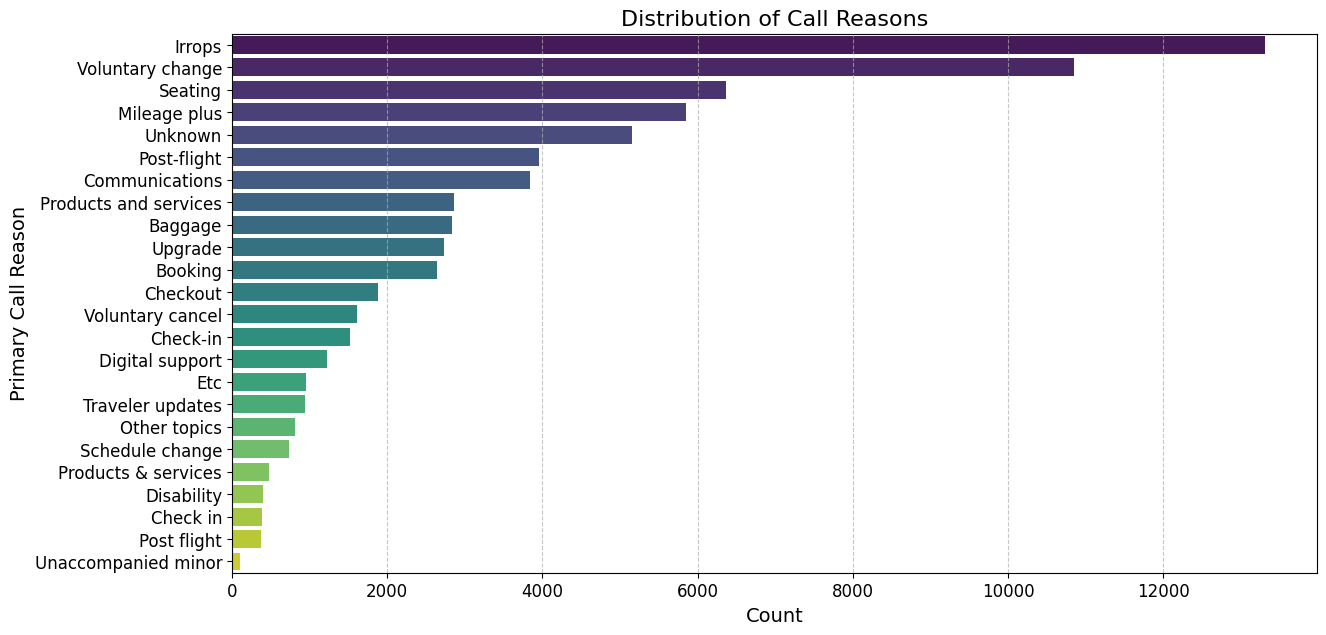

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(y='primary_call_reason', data=calls_df, order=calls_df['primary_call_reason'].value_counts().index, palette='viridis')
plt.title('Distribution of Call Reasons', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Primary Call Reason', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-11-9cf58ef84800>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_reason_calls['processed_transcript'] = unknown_reason_calls['call_transcript'].apply(preprocess_text)


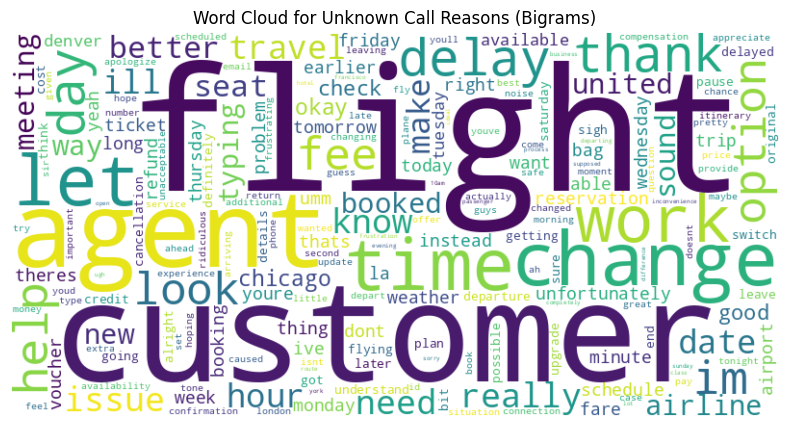

Topic 0:
looks like today customer youre welcome agent youre help today agent problem customer hi agent okay let pull im calling
Topic 1:
looks like understand frustration agent understand customer ugh earlier flight let know let check customer hi today customer agent youre
Topic 2:
agent youre youre welcome looks like agent problem let look san francisco customer hi today customer im calling let pull
Topic 3:
looks like understand frustration agent youre today customer im sorry travel voucher customer yeah help today let know customer service
Topic 4:
change fee looks like agent youre youre welcome really appreciate let look let know rest day agent understand customer hi


In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
import string

# Ensure you have the necessary NLTK data
nltk.download('stopwords')

# Filter calls with 'Unknown' reason
unknown_reason_calls = calls_df[calls_df['primary_call_reason'] == 'Unknown']

# Preprocess the call transcripts
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

unknown_reason_calls['processed_transcript'] = unknown_reason_calls['call_transcript'].apply(preprocess_text)

# Generate a word cloud using bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(unknown_reason_calls['processed_transcript'])
bigrams = vectorizer.get_feature_names_out()
bigrams_joined = ['_'.join(bigram.split()) for bigram in bigrams]  # Join bigrams with an underscore
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(bigrams_joined))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Unknown Call Reasons (Bigrams)')
plt.show()

# Topic modeling using LDA with bigrams
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

In [ ]:
sentiment_df.head(10)

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35
5,5297766997,817160,calm,calm,0.10,0.11
6,324593040,519057,neutral,frustrated,0.00,0.25
7,8902603117,488324,calm,angry,0.11,0.35
8,7222687732,957331,calm,neutral,0.06,0.54
9,4113684017,158319,neutral,angry,-0.19,0.29


In [ ]:
import altair as alt

# Histogram of average sentiment
alt.Chart(sentiment_df.head(200)).mark_bar().encode(
    alt.X("average_sentiment", bin=True),
    y='count()'
).properties(
    title="Distribution of Average Sentiment"
)
reason_id
# Boxplot of sentiment by agent tone
alt.Chart(sentiment_df.head(200)).mark_boxplot().encode(
    x='agent_tone',
    y='average_sentiment'
).properties(
    title="Sentiment by Agent Tone"
)

# Scatter plot of sentiment vs silence percentage
alt.Chart(sentiment_df.head(200)).mark_circle().encode(
    x='average_sentiment',
    y='silence_percent_average'
).properties(
    title="Sentiment vs Silence Percentage"
)



/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import nltk
from nltk.corpus import stopwords
import string

# Ensure you have the necessary NLTK data
nltk.download('stopwords')

# Preprocess the call transcripts
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

calls_df['processed_transcript'] = calls_df['call_transcript'].apply(preprocess_text)

# Extract key phrases using TF-IDF and NMF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(calls_df['processed_transcript'])
nmf = NMF(n_components=10, random_state=42)
nmf.fit(tfidf)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {topic_idx}"] = topic_words
    return topics

no_top_words = 10
topics = display_topics(nmf, vectorizer.get_feature_names_out(), no_top_words)

# Map topics to primary call reasons
topic_reason_mapping = {}
for topic, words in topics.items():
    for word in words:
        reasons = calls_df[calls_df['processed_transcript'].str.contains(word)]['primary_call_reason'].unique()
        topic_reason_mapping[topic] = reasons

# Display the mapping
for topic, reasons in topic_reason_mapping.items():
    print(f"{topic}: {', '.join(reasons)}")

# Identify recurring problems that could be resolved via self-service options
recurring_problems = {}
for topic, reasons in topic_reason_mapping.items():
    for reason in reasons:
        if reason not in recurring_problems:
            recurring_problems[reason] = []
        recurring_problems[reason].extend(topics[topic])

# Display the recurring problems
for reason, problems in recurring_problems.items():
    print(f"Primary Call Reason: {reason}")
    print(f"Recurring Problems: {', '.join(set(problems))}")
    print()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Topic 0: Irrops, Mileage plus, Voluntary change, Other topics, Post flight, Schedule change, Products & services, Seating, Upgrade, Check in, Communications, Booking, Checkout, Voluntary cancel, Traveler updates, Unknown, Baggage, Digital support, Etc, Disability, Post-flight, Unaccompanied minor, Check-in, Products and services
Topic 1: Voluntary cancel, Upgrade, Mileage plus, Checkout, Irrops, Post flight, Seating, Communications, Products & services, Unknown, Voluntary change, Disability, Unaccompanied minor, Schedule change, Traveler updates, Booking, Baggage, Digital support, Check in, Etc, Other topics, Post-flight, Check-in, Products and services
Topic 2: Checkout, Post flight, Seating, Baggage, Mileage plus, Irrops, Products & services, Communications, Voluntary cancel, Voluntary change, Traveler updates, Upgrade, Other topics, Etc, Booking, Check in, Unknown, Schedule change, Digital support, Disability, Post-flight, Check-in, Products and services, Unaccompanied minor
Topic 3

In [ ]:
%pip install -q "google-generativeai>=0.7.2s"

In [ ]:
from google.colab import userdata
import google.generativeai as genai

GOOGLE_API_KEY=userdata.get('API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
model = genai.GenerativeModel(model_name='gemini-1.5-pro-002')

In [ ]:
def generate_gemini_prompt(reason, recurring_problems):
  prompt = f"""
  Analyze the following information and provide a concise and actionable summary of the recurring problems
  related to the call reason '{reason}'.

  **Primary Call Reason:** {reason}

  **Recurring Problems:** {', '.join(recurring_problems)}

  **Summary Objectives:**

  * Identify the key issues underlying these recurring problems.
  * Suggest potential solutions or areas for improvement to address the recurring problems and reduce the need for calls related to '{reason}'.
  * Present the information in a way that's easy to understand and actionable for customer service improvement initiatives.

  """
  return prompt


In [ ]:
import time
for reason, problems in recurring_problems.items():
  prompt = generate_gemini_prompt(reason, list(set(problems)))
  print(f"REASON '{reason}'")
  try:
      response = model.generate_content([prompt])
      print(f"AI Response for '{reason}':\n{response.text}\n")
  except Exception as e:
      print(f"An error occurred: {e}")
  time.sleep(10)


REASON 'Irrops'
AI Response for 'Irrops':
**Irrops Call Driver Analysis:**

Customers frequently contact support due to disruptions (Irrops) stemming from:

* **Flight Schedule Changes:** Delays, cancellations, and changes to scheduled times (implied by "delayed," "missed," "schedule," "delays," "weather," "forecast," "earlier," "tonight," "tomorrow," "scheduled").  This leads to missed connections, changed itineraries ("itinerary," "change,"  "instead," "following," "dates"), and the need for rebooking ("standby," "booked," "reservation," "new," "assignment," "availability," "seats," "seat").
* **Baggage Issues:** Lost ("lost"), delayed ("luggage," "bags," "baggage," "bag," "checked"), and improperly handled baggage (implied by complaints like "ugh," "frustration").
* **Compensation and Refunds:** Requests for refunds ("refund," "fare," "double," "fee," "150", "500"), vouchers ("voucher"), and travel waivers ("waive") resulting from disruptions.
* **Rebooking Challenges:** Difficulty 

An error occurred: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-pro-002:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
REASON 'Checkout'
AI Response for 'Checkout':
Checkout calls frequently involve issues with **flight changes & disruptions**, **baggage**, **seat assignments**, and **refund/voucher requests**.  

**Key Issues & Potential Solutions:**

* **Flight Changes & Disruptions:** Customers frequently call about delays, cancellations (missed, delayed, schedule, weather), and changing reservations (change, earlier, dates, time, itinerary, tomorrow, tonight).  
    * **Solution:** Proactive notification of disruptions, flexible rebooking options online, and clear communication about compensation (voucher, refund).

* **Baggage:** Lost, delayed, or checked baggage (luggage, baggage, bags, bag, checked, lost) generates numerous calls.  
    * **Solution:** Improved baggage tracking, clear baggage poli